# Dense Neural Network: NLP Application
[Edward Toth, PhD, University of Sydney]

- e-mail: eddie_toth@hotmail.com
- Add me on: https://www.linkedin.com/in/edward-toth/ 
- Join the community: https://www.meetup.com/Get-Singapore-Meetup-Group/
- Data Avenger: https://data-avenger.mailchimpsites.com/

## <center> WTF is Pandas: Online Course <center> 
    Stage 1   
    - Learn to speak Python-tongue
    (Python basics, Conditional/Loop statements, Functions)
    Stage 2 
    - Unleash your inner Pandas
    (Create Series/DataFrame, Styling, Read files and so on)
    Stage 3 
    - Mystical arts of Data Manipulation
    (Clean, Prepare, Merge data and much more Magic)
    Stage 4 
    - Mind-Body-Data Connection
    (Understanding Data with Statistics, Grouping and Visualization) 
    
 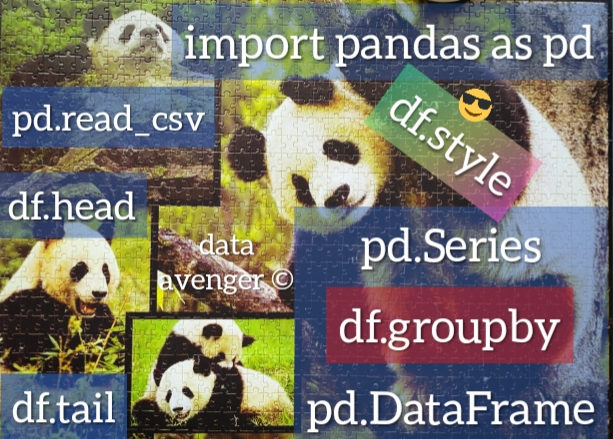#   
    

NLP — Natural Language Processing (not Neuro-linguistic programming) is combines study of language with data science. Topics of interest:
- Language Translation
- Name/Entity Recognition
- Question and Answering 
- Text Summarization  
- Topic Classification
- ### ** Sentiment Analysis **

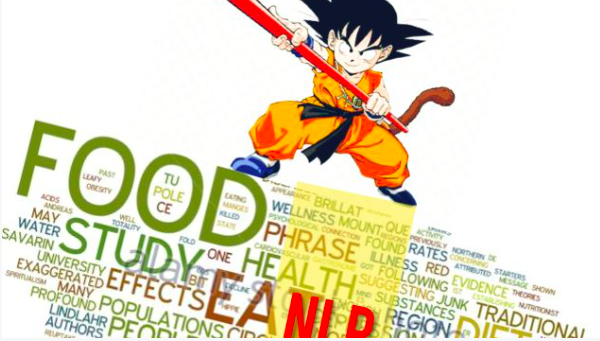

Dataset: https://www.kaggle.com/columbine/imdb-dataset-sentiment-analysis-in-csv-format

Following: https://www.kaggle.com/abdulmeral/sentiment-analysis-by-neural-network



1. [Load Libraries](#1)  
1. [Read Data](#2)
1. [Quick Data Analysis](#3)
1. [Data Preparation](#4)
1. [Dense Neural Network ](#5)   
   a. [Design-Compile-Fit](#6) <br />
   b) [Assess](#7)
     * [Accuracy](#8) 
     * [ROC](#9) 
     * [Making Prediction](#10) 
    

<a id = "1"></a><br>
## Load Libraries

In [ ]:
#libraries
from keras.models import Sequential 
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt

# Text prep
from textblob import TextBlob
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer # Great way to count text data frequency
from sklearn import decomposition, ensemble
#
from sklearn import metrics
#
import textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

import nltk
from nltk.corpus import stopwords
#
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


<a id = "2"></a><br>
## Read Data
Here we have a training, test and validation set of different text for our sentiment analysis problem. 
- Training: Train a model to the behavior/pattern from the input data.
- Validation: Adjusts/Optimizes the parameters of the model to reduce bias.  
- Test: Evaluates the performance of the model on an unseen data set.

More information, visit https://machinelearningmastery.com/difference-test-validation-datasets/


### What size should you split each dataset?
From Prof Andrew Ng’s CS230 Deep Learning course (https://cs230.stanford.edu/blog/split/ ), he recommends 

- Training Size: 80%

- Validation Size: 10%

- Testing Size: 10%


In [ ]:
train = pd.read_csv("/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv")
valid = pd.read_csv("/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Valid.csv")
test = pd.read_csv("/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Test.csv")

train.head()

## Train Dataset Analysis # train.info()b

In [ ]:
sizes = [len(train), len(test), len(valid)]
print([ "{0:.0%}".format(el/sum(sizes)) for el in sizes])

#  print('\n'.join('{}: {}'.format(*k) for k in enumerate(lst)))

<a id = "3"></a><br>
## Quick Data Analysis

In [ ]:
print(train.shape)
train.label.value_counts()

In [ ]:
test.groupby("label").count()


In [ ]:
valid.groupby("label").count()

<a id = "4"></a><br>
## Data Preparation
1. Get rid of unnecessary text (punctuations/symbols, numbers, stopwords)
2. Transform text into counts (i.e. frequency of words)

In [ ]:
def transformations(dataframe):
    # upper to lower character
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
    # clear punctuations
    dataframe['text'] = dataframe['text'].str.replace('[^\w\s]','')
    # clear numbers
    dataframe['text'] = dataframe['text'].str.replace('\d','')
    # get rid of stopwords 
    sw = stopwords.words('english')
    dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))
    # Faster way to get rid of Stopwords
    from collections import Counter
    sw = stopwords.words('english')
    sw_dict = Counter(sw)
    dataframe['text'] = dataframe['text'].apply(lambda x: ' '.join([x for x in x.split() if x not in sw_dict]))
    #    #Delete rare characters 
    #     sil = pd.Series(' '.join(dataframe['text']).split()).value_counts()[-1000:]
    #     # Faster way to get rid of 
    #     dataframe['text'] = dataframe['text'].apply(lambda x: " ".join(x for x in x.split() if x not in sil))
    # Add spaces between text
#     from textblob import Word
#     dataframe['text'] = dataframe['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) 
    return dataframe

In [ ]:
train = pd.read_csv("/kaggle/input/imdb-dataset-sentiment-analysis-in-csv-format/Train.csv")
train.head()
%time train = transformations(train)
train.head()

In [ ]:
train.loc[0,'text']

In [ ]:
valid = transformations(valid)
valid.head()

In [ ]:
 test = transformations(test)
test.head()

In [ ]:
# Data splits 
train_x = train['text']
valid_x = valid["text"]
train_y = train["label"]
valid_y = valid["label"]

- Transform text data into count data
- Counts the occurence of words


In [ ]:
vectorizer = CountVectorizer()
vectorizer.fit(train_x)

In [ ]:
print("Number of Words in Vocabulary List:",
      len(vectorizer.vocabulary_) )
d = vectorizer.vocabulary_
list(d.items())[:10]


In [ ]:
x_train_count = vectorizer.transform(train_x)
x_valid_count = vectorizer.transform(valid_x)
x_test_count  = vectorizer.transform(test["text"])


In [ ]:
print("Number of Reviews: ", x_train_count.shape[0], "Length of Vocabulary: ",x_train_count.shape[1]  )
# print("Counts words in reviews in Vocabulary list", x_train_count[1]) # sparse matrix with 0 and 1
dir(x_train_count[1]) #.getrow
x_train_count[1].nnz

In [ ]:
# plt.spy(x_train_count, markersize=0.1)
# plt.show()

<a id = "5"></a><br>
## Dense Neural Network 

<a id = "6"></a><br>
### 1. Design 
Designing your own car! <br><br>
Last week's design: Each of the 60,000 (training set) images has $28 \times 28$ pixels

    TRAIN_SHAPE = (28, 28)
    model = Sequential([
        Flatten(input_shape = TRAIN_SHAPE ), # Reshapes the dimensionality of images
        Dense(512, activation='relu'), # Fully connected (Dense) layer with 512 neurons in the hidden layer
        Dense(10, activation='softmax') # The model outputs softmax probabilities for each of the 10 categories 
      ])
      
This week's design: Each of the 40,000 movie reviews (training set) are summarized by counts from a vocabulary list of 155662 words

    model = Sequential([
    # first dense layer
    Dense(50,input_dim = 155662,  kernel_initializer="uniform", activation="relu"),
    # ouput layer 
    model.add(Dense(1,  kernel_initializer="uniform", activation="sigmoid") 
    ])    
__ kernel_initializer="uniform"__: Uniform distribution to initialize the weights <br><br>
__Activation functions__ map set of inputs to a value in the next layer of the neural network. Simple functions such as:
- 'relu': Rectified linear unit applies `max(x, 0)` which compares the maximum of 0 and the input values.
- 'sigmoid': Applies the sigmoid function defined as $1 / (1 + \exp(-x))$ to classify data with a label. <br> <br>
__Bias__ values shift the activation function to the left or right, which may be critical for successful learning. 
In a linear model (y = mx + b), bias represents the intercept term 'b'. <br><br>
__Parameters__ in the first dense layer: Each word in the vocabulary list (155662 words) is connected with 50 neurons in dense layer. There is additional 50 parameters to account for bias of the neurons, that is a total of $155662 \times 50 + 50$. <br>
__Parameters__ in the first output layer: Each of the 50 neurons is mapped to a single output value and there's one extra parameter to account for the bias of the output value, that is $50+1$ parameters. 

 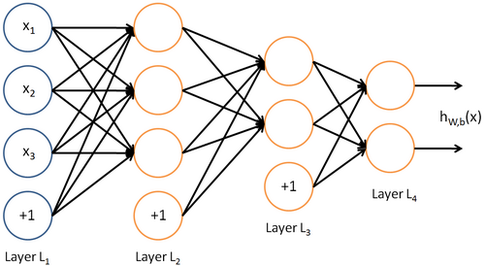 
    
### 2. Compile
`model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])`
- Loss: `Binary_crossentropy` is used for binary output `(0,1)`. This measures how close the training data is with the test data. Drives your parameter estimation like fuel in your car. 
- Optimizer: `Adam` has an adaptive learning rate (updates the model). Optimizer is the type of fuel your model (car) needs to perform well.  
- Metrics: `accuracy` for training set is recorded.

### 3. Fit
`model.fit(x_train_count, train_y.values.reshape(-1,1), validation_data=(x_valid_count,valid_y), nb_epoch=2, batch_size=128)`
[For some reason: Doesn't work if I do this individual code]
- Reshape labels in a 1D-array 
- Validation data is used to fine tune to model parameters. More at https://machinelearningmastery.com/difference-test-validation-datasets/
- Choose a small number of iterations to update model parameters (epoches=2). 
- Batch size=128 means instead of updating the model with one data observation at a time, the model is updated with batches of data points.



In [ ]:
# 1. DESIGN
model = Sequential() 
# First layer
model.add(Dense(50,input_dim=x_train_count.shape[1], kernel_initializer="uniform", activation="relu")) 
# Output Layer
model.add(Dense(1, kernel_initializer="uniform", activation="sigmoid")) 
# 2. COMPILE
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 3. FIT the model
history = model.fit(x_train_count, train_y.values.reshape(-1,1), validation_data=(x_valid_count,valid_y), nb_epoch=2, batch_size=128)

In [ ]:
model.summary()
print("Parameters in first dense layer:",155662*50 +50)

### Model 2 (with Dropout Layer)
#### A dropout layer
- What's the problem? The model has too many parameters 
- Why? Important to preventing overfiting (memorize info on train data but poor generalized perforamnce)
- How? Randomly "drops out" parameters by setting values to zero with a certain probability. <br> Having a dropout rate reduces strong dependencies between portions of adjacent layers. More details at http://jmlr.org/papers/v15/srivastava14a.html <br>
https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/

In [ ]:
# 1. DESIGN with dropout! 
model2 = Sequential() 
# Additional Drop out layer
model2.add(Dropout(0.4,input_shape=(x_train_count.shape[1],)))  #input_shape=(155662,)
# First layer
model2.add(Dense(50,input_dim=x_train_count.shape[1], kernel_initializer="uniform", activation="relu")) 

# Output Layer
model2.add(Dense(1, kernel_initializer="uniform", activation="sigmoid")) 
# 2. COMPILE
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
# 3. FIT the model
history = model2.fit(x_train_count, train_y.values.reshape(-1,1), validation_data=(x_valid_count,valid_y), nb_epoch=2, batch_size=128)

<a id = "7"></a><br>
## 4. Assess Model
a) Accuracy <br>
b) ROC <br>
c) Making a Prediction 

<a id = "8"></a><br>
### Accuracy
Proportion of correct guesses! 

In [ ]:
loss, acc = model.evaluate(x_test_count, test["label"], verbose=0)
loss, acc2 = model2.evaluate(x_test_count, test["label"], verbose=0)
print('Test Model 1 Accuracy: %f' % (acc*100), 'Test Model 2 Accuracy: %f' % (acc2*100))

<a id = "9"></a><br>
### ROC
Receiver operating characteristic (ROC) measures the model performance at different classification thresholds. The ROC curve has:
- True Positive Rate (proportion of known positives that are correctly identified) on y-axis
- False Positive Rate (proportion of  known negatives that are incorrectly classified) on x-axis. 
- Best results is where the area under the ROC curve is close 1. 

More details, visit
https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc#:~:text=ROC%20curve,False%20Positive%20Rate <br>
https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5#:~:text=AUC%20%2D%20ROC%20curve%20is%20a,capable%20of%20distinguishing%20between%20classes.


In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model.predict_proba(x_valid_count)
preds = probs[:,:]
fpr, tpr, threshold = metrics.roc_curve(test["label"], y_test)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = model2.predict_proba(x_valid_count)
preds = probs[:,:]
fpr, tpr, threshold = metrics.roc_curve(test["label"], y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<a id = "10"></a><br>
## Making Prediction

In [ ]:
comment_1 = pd.Series("that movie was great")
comment_2 = pd.Series("it was not so bad")

In [ ]:
comment_1  = vectorizer.transform(comment_1)
comment_2 = vectorizer.transform(comment_2)


### A Positive Comment

In [ ]:
print("Positive Sentiment:", model.predict_classes(comment_1),
model2.predict_classes(comment_1))

### A Negative Comment

In [ ]:
print("Negative Sentiment:", model.predict_classes(comment_2),
      model2.predict_classes(comment_2))

#THE END 
## <center> WTF is Pandas: Online Course <center> 
    Stage 1   
    - Learn to speak Python-tongue
    (Python basics, Conditional/Loop statements, Functions)
    Stage 2 
    - Unleash your inner Pandas
    (Create Series/DataFrame, Styling, Read files and so on)
    Stage 3 
    - Mystical arts of Data Manipulation
    (Clean, Prepare, Merge data and much more Magic)
    Stage 4 
    - Mind-Body-Data Connection
    (Understanding Data with Statistics, Grouping and Visualization) 
    
<img src="https://media.giphy.com/media/Ix6QPu53WlB6w/giphy.gif" alt="" title="pandas"  style="width: 500px;"/>
    
    
    
- e-mail: eddie_toth@hotmail.com
- Add me on: https://www.linkedin.com/in/edward-toth/ 
- Join the community: https://www.meetup.com/Get-Singapore-Meetup-Group/
- Data Avenger: https://data-avenger.mailchimpsites.com/

In [ ]:
### Model  Fit
[Sometimes it doesn't work if I run this individual code due to sparse matrix.]

- .todense()
- .toarray()

- SVM or Random Forest in a pipeline: 
https://stackoverflow.com/questions/28384680/scikit-learns-pipeline-a-sparse-matrix-was-passed-but-dense-data-is-required